<a href="https://colab.research.google.com/github/satishgunjal/Machine_Learning_Tutorials/blob/master/05_Logistic_Regression/Binary_Logistic_Regression_Using_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![logistic_regression_sklearn_header.png](https://raw.githubusercontent.com/satishgunjal/images/master/logistic_regression_sklearn_header.png)

In this tutorial we are going to use the Logistic Model from Sklearn library. We are also going to use the same test data used in [Logistic Regression From Scratch With Python](https://satishgunjal.github.io/binary_lr/) tutorial

## Introduction
Scikit-learn is one of the most popular open source machine learning library for python. It provides range of machine learning models, here we are going to use logistic regression linear model for classification. Sklearn logistic regression supports binary as well as multi class classification, in this study we are going to work on binary classification.

The way we have implemented our own cost function and used advanced optimization technique for cost function optimization in [Logistic Regression From Scratch With Python](https://satishgunjal.github.io/binary_lr/) tutorial, every sklearn algorithm also have cost function and optimization objective.

# Python Code

Now we will implement the Logistic regression algorithm in Python and build a classification model that estimates an applicant's probability of admission based on Exam 1 and Exam 2 scores.

## Import Libraries
* pandas: Used for data manipulation and analysis
* numpy : Numpy is the core library for scientific computing in Python. It is used for working with arrays and matrices.
* matplotlib : It's plotting library, and we are going to use it for data visualization
* model_selection: Here we are going to use train_test_split() class
* linear_model: Here we are going to LogisticRegression() class
 



In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection 
from sklearn import linear_model

## Load The Data
* We are going to use 'admission_basedon_exam_scores.csv' CSV file
* File contains three columns 	Exam 1 marks,	Exam 2 marks and	Admission status

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/satishgunjal/datasets/master/admission_basedon_exam_scores.csv')
m, n = df.shape
print('Number of training examples = ', m)
print('Number of features = ', n - 1) # Not counting the 'Label: Admission status'
df.sample(5) # Show random 5 training examples

Number of training examples =  100
Number of features =  2


,Exam 1 marks,Exam 2 marks,Admission status
26,80.190181,44.821629,1
76,47.264269,88.475865,1
25,62.271014,69.954458,1
81,94.834507,45.694307,1
91,90.448551,87.508792,1


## Data Understanding
* There are total 100 training examples (m= 100 or 100 no of rows)
* There are two features Exam 1 marks and Exam 2 marks
* Label column contains application status. Where '1' means admitted and '0' means not admitted



## Data Visualization

To plot the data of admitted and not admitted applicants, we need to first create separate data frame for each class(admitted/not-admitted)


In [3]:
df_admitted = df[df['Admission status'] == 1]
print('Dimension of df_admitted= ', df_admitted.shape)
df_admitted.sample(5)

Dimension of df_admitted=  (60, 3)


,Exam 1 marks,Exam 2 marks,Admission status
96,42.261701,87.103851,1
83,57.238706,59.514282,1
85,68.468522,85.594307,1
59,71.796462,78.453562,1
88,78.635424,96.647427,1


In [4]:
df_notadmitted = df[df['Admission status'] == 0]
print('Dimension of df_notadmitted= ', df_notadmitted.shape)
df_notadmitted.sample(5)

Dimension of df_notadmitted=  (40, 3)


,Exam 1 marks,Exam 2 marks,Admission status
29,38.785804,64.995681,0
64,44.668262,66.450086,0
35,54.635106,52.213886,0
92,55.482161,35.570703,0
61,35.286113,47.020514,0


Now lets plot the scatter plot for admitted and not admitted students

Text(0.5, 1.0, 'Admitted Vs Not Admitted Applicants')

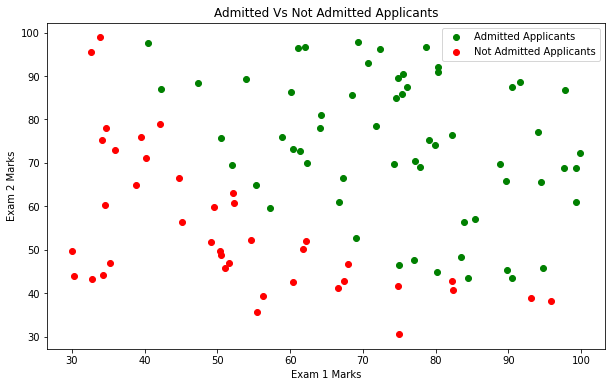

In [12]:
plt.figure(figsize = (10,6))
plt.scatter(df_admitted['Exam 1 marks'], df_admitted['Exam 2 marks'], color='green', label='Admitted Applicants')
plt.scatter(df_notadmitted['Exam 1 marks'], df_notadmitted['Exam 2 marks'], color='red', label='Not Admitted Applicants')
plt.xlabel('Exam 1 Marks')
plt.ylabel('Exam 2 Marks')
plt.legend()
plt.title('Admitted Vs Not Admitted Applicants')

## Build Machine Learning Model

## Create Feature Matrix X and Label Vector y

In [0]:
# Get feature columns from datframe
X = df.iloc[:, 0:2]
y = df.iloc[:, -1]

## Create Test And Train Dataset
* We will split the dataset, so that we can use one set of data for training the model and one set of data for testing the model
* We will keep 20% of data for testing and 80% of data for training the model
* If you want to learn more about it, please refer [Train Test Split](https://satishgunjal.com/train_test_split/) tutorial
 



In [46]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (80, 2)
X_test dimension=  (20, 2)
y_train dimension=  (80,)
y_train dimension=  (20,)


## Sklearn Logistic Regression

In [48]:
lm = linear_model.LogisticRegression()
# Training the model using training data
lm.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Visualization
* Let's plot decision boundary to cross-check the accuracy of our model
* I am using code from sklearns site. [Reference](https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html)

In [0]:
def plot_decision_boundary(X, Y, X_label, Y_label):
  """
  Plot decision boundary based on results from sklearn logistic regression algorithm

  I/P
  ----------
  X : 2D array where each row represent the training example and each column represent the feature ndarray.
      m= number of training examples
      n= number of features
  y : 1D array of labels/target value for each traing example.

  O/P
  -------
  Plots the decision boundary
  """
  logreg = linear_model.LogisticRegression(C=1e5)

  # Create an instance of Logistic Regression Classifier and fit the data.
  logreg.fit(X, Y)

  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, x_max]x[y_min, y_max].
  x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
  y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
  h = .02  # step size in the mesh
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.figure(1, figsize=(10, 6))
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

  # Plot also the training points
  plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
  plt.xlabel(X_label)
  plt.ylabel(Y_label)

  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.xticks(())
  plt.yticks(())

  plt.title("Decision Boundary")
  plt.show()

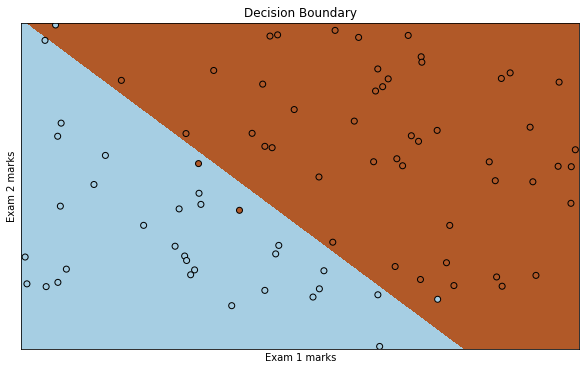

In [101]:
plot_decision_boundary(X_train.values, y_train.values, "Exam 1 marks", "Exam 2 marks")

## Testing The Model
* For testing we are going to use the test data only
* **Question: Predict an admission probability for applicant with scores 45 in Exam 1 and 85 in Exam 2**

In [84]:
# Input data should be 2D array
prob = lm.predict_proba([[45, 85]])
print ('Probability of getting admission is %s, and probability of not getting admission is %s' % (prob[:,1], prob[:,0]))

Probability of getting admission is [0.74012176], and probability of not getting admission is [0.25987824]


## Accuracy Of Model

In [65]:
predictedAdmissionStatus= pd.DataFrame(lm.predict(X_test), columns=['Predicted Admission status'])
actualAdmissionStatus = pd.DataFrame(y_test, columns=['Admission status'])
actualAdmissionStatus = actualAdmissionStatus.reset_index(drop=True) # Drop the index so that we can concat it, to create new dataframe
df_actual_vs_predicted = pd.concat([actualAdmissionStatus,predictedAdmissionStatus],axis =1)
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Admission status,0,1,0,1,1,0,1,1,1,1,0,1,0,0,1,0,1,0,1,0
Predicted Admission status,1,1,0,1,1,1,1,1,1,1,0,1,0,0,1,1,1,0,0,0


## Probability For Entire Test Set
Probability output  contains two columns, first column represent probability of negative class(0) and second column represent the probability of positive class(1)

In [86]:
lm.predict_proba(X_test)

array([[9.76130141e-03, 9.90238699e-01],
       [6.14312272e-02, 9.38568773e-01],
       [8.15477257e-01, 1.84522743e-01],
       [1.15938452e-05, 9.99988406e-01],
       [6.45091832e-02, 9.35490817e-01],
       [1.06897009e-01, 8.93102991e-01],
       [1.35450967e-01, 8.64549033e-01],
       [1.56234150e-04, 9.99843766e-01],
       [5.62165345e-02, 9.43783465e-01],
       [4.57353754e-03, 9.95426462e-01],
       [9.99762159e-01, 2.37841324e-04],
       [4.68658463e-06, 9.99995313e-01],
       [9.93493276e-01, 6.50672430e-03],
       [9.79207714e-01, 2.07922863e-02],
       [1.05902317e-03, 9.98940977e-01],
       [4.69621011e-03, 9.95303790e-01],
       [3.11716254e-01, 6.88283746e-01],
       [9.53870297e-01, 4.61297034e-02],
       [6.91008637e-01, 3.08991363e-01],
       [9.86840695e-01, 1.31593053e-02]])

## Model Score

In [66]:
print('Model Score= ', lm.score(X_test, y_test))

Model Score=  0.8


## Conclusion
This concludes our binary logistic regression study using sklearn library. In next tutorial I will cover multi class logistic regression.